## Logistic Regression, Linear Discriminant Analysis,  Quadratic Discriminant Analysis 

### Data dictionary: (Mushrooms)
>class: edible(e) or poisonous(p)

>cap-shape: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

>cap-surface: fibrous(f), grooves(g), scaly(y), smooth(s)

>cap-color: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

>bruises: bruises(t), no bruises(f)

>odor: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

>gill-attachment: attached(a), descending(d), free(f), notched(n)

>gill-spacing: close(c), crowded(w), distant(d)

>gill-size: broad(b), narrow(n)

>gill-color: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

>stalk-shape: enlarging(e), tapering(t)

>stalk-root: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

>stalk-surface-above-ring: fibrous(f), scaly(y), silky(k), smooth(s)

>stalk-surface-below-ring: fibrous(f), scaly(y), silky(k), smooth(s)

>stalk-color-above-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

>stalk-color-below-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

>veil-type: partial(p), universal(u)

>veil-color: brown(n), orange(o), white(w), yellow(y)

>ring-number: none(n), one(o), two(t)

>ring-type: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

>spore-print-color: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

>population: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

>habitat: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import roc_curve, auc, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


%matplotlib inline 
warnings.simplefilter('ignore')

print('Successfully loaded in packages.')

Successfully loaded in packages.


In [2]:
mushroom = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/mushrooms.csv')
mushroom.info()
mushroom.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
mushroom.head(5)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

### Visualizing the distribution of data within this dataset 

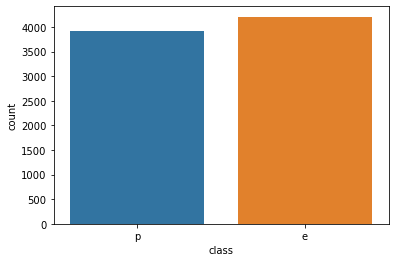

In [4]:
x = mushroom['class']
ax = sns.countplot(x=x, data = mushroom)

Fairly balanced for the target variable (whether it is poisonous vs edible) so there isn't much preprocessing required for this dataset 

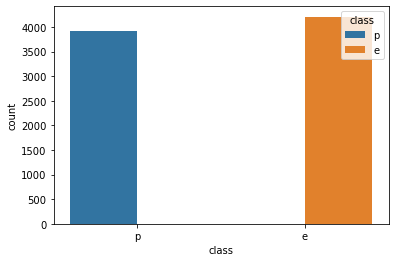

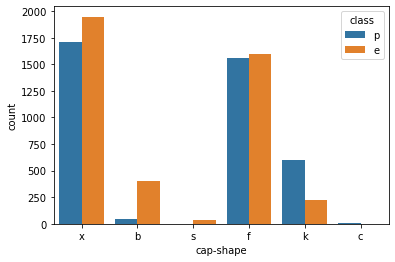

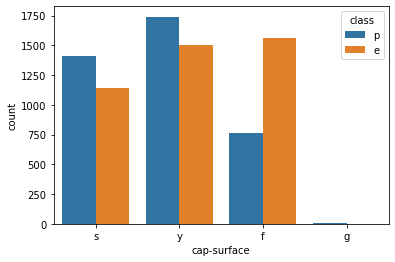

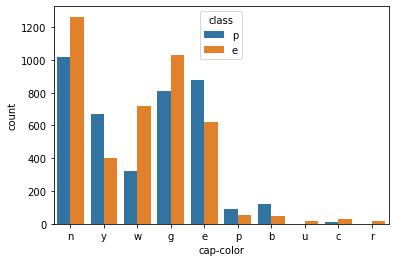

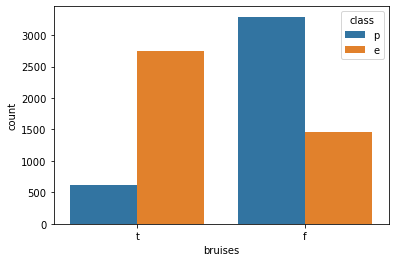

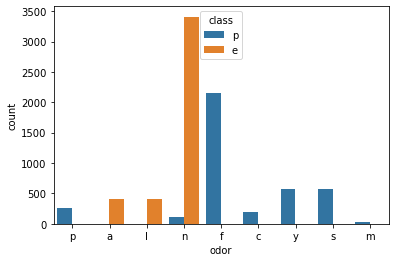

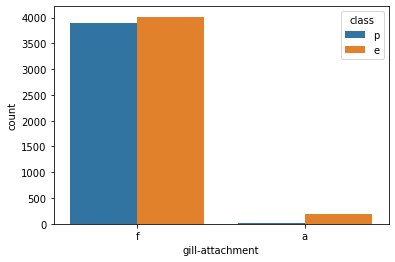

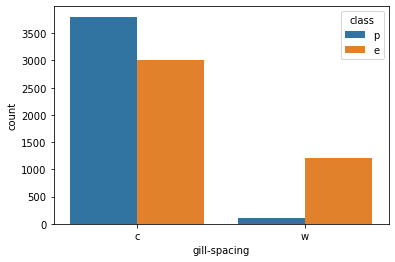

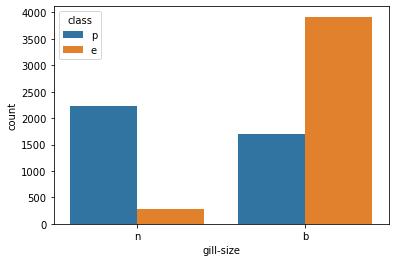

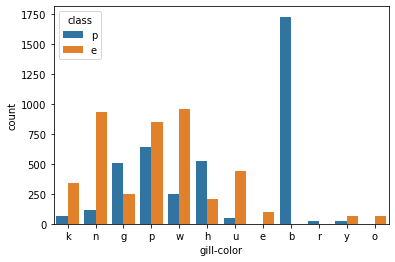

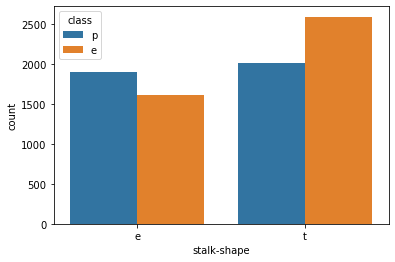

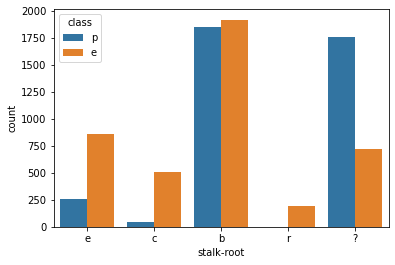

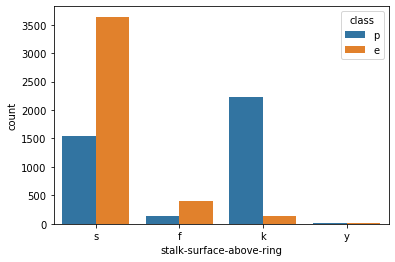

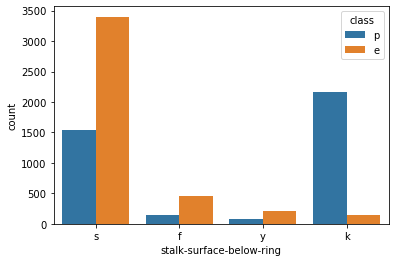

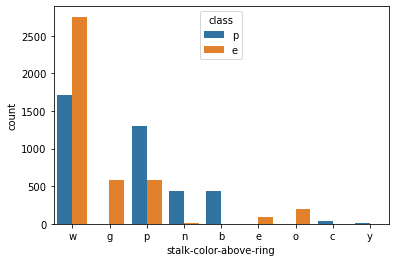

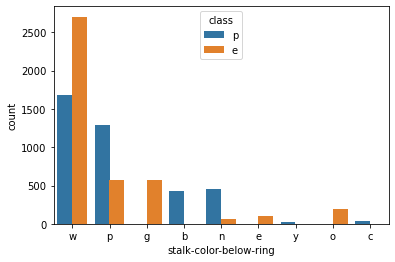

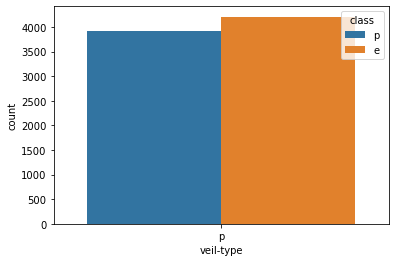

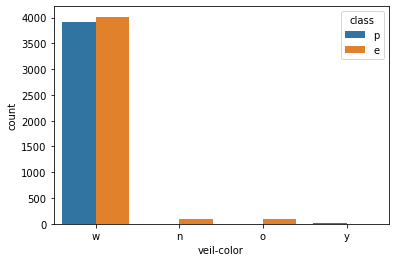

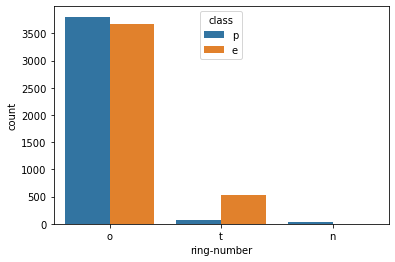

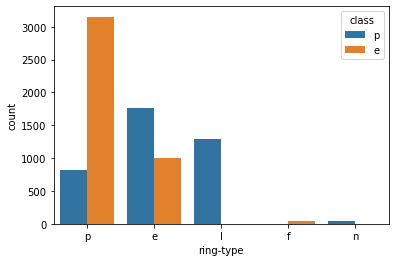

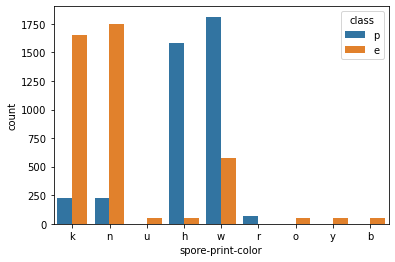

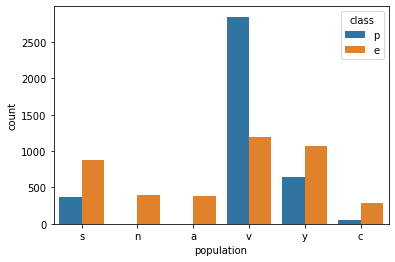

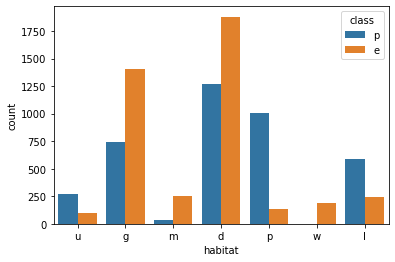

In [5]:
def plot_data(data):
    for i, col in enumerate(mushroom.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue= data['class'], data=mushroom)

plot_data(mushroom)

### Preprocessing 

In [6]:
for col in mushroom.columns: 
    print(f'{col}: {mushroom[col].isnull().sum()}')

#mushroom.isnull().sum()

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


There is no null values within this dataset 

In [7]:
t = mushroom['class'].value_counts()
print(f'Original values:\n{t}')
le = LabelEncoder() 
mushroom['class'] = le.fit_transform(mushroom['class'])
t = mushroom['class'].value_counts()
print(f'Modified values:\n{t}')

Original values:
e    4208
p    3916
Name: class, dtype: int64
Modified values:
0    4208
1    3916
Name: class, dtype: int64


Normalize the labels by changing the target variable into binary classes: 0 = False 1 = True
- LabelEncoder implies an order to the labeling and therefore it is easier to differentiate between what is what (e.g: alpabetical)
- transform data from whatever domain, so that the domain is 0,...,  k-1, where k is the number of classes; in this case we have two which is ideal for logistic regression (>2 classes is NOT ideal with logistic regression model)

In [15]:
print('Transformed column of interest as seen:')
display(mushroom.head(5))
encoded_data = pd.get_dummies(mushroom)
print('One hot encoding of all columns:')
display(encoded_data.head(5))

Transformed column class as seen:


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

One hot encoding of all columns:


class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1            0            0            0            0            0   
1      0            0            0            0            0            0   
2      0            1            0            0            0            0   
3      1            0            0            0            0            0   
4      0            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 118 columns]

For every feature, we either have true or false. This is why there are *significantly* more columns
- get_dummies returns a new column for **EACH unique** item 
- values within the column indicates whether or not the record has that attribute 
- eliminates preassumption of order and therefore 

Alternative, my preferred method in reducing memory consumption is cat.codes 
- unlike get_dummies, cat.codes return a unique integer value for each unique item within the column 
- ML models, such as random forest, should in application, remove any associations with order 

### Modeling 

In [16]:
y = mushroom['class'].values.reshape(-1,1)
X = encoded_data.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


Normalizing the target variable of class from -1 to 1 

Additional notes: 
- X_train = ALL independent variables used to train; in this case 80% will be used for training
- X_test = ALL independent variables used to test and make predictions; remainder from the train 
- y_train = TARGET or dependent variable which needs to be predicted by this model; includes category labels against independent variables 
- y_test = TARGET or dependent variable which needs to be compared to prediction value with given X_test to test the accuracy between actual and predicted categories 
- test_size = 0.2 *means* that **20%** of the dataset will be randomly removed to be test set and the rest to train, and *therefore* **80%** of the observations from the dataset will be used to train and fit the model 
- random_state = FOR maintaining uniformity when performing tests 


### Logistic regression

In [19]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())

y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

Classifying the mushrooms where if the probability threshold is greater than 0.5, then it will be 1--if not then 0

In [26]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f'The confusion matrix is:\n {log_confusion_matrix}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'The roc_auc is: {roc_auc}')

The confusion matrix is:
 [[843   0]
 [  0 782]]
The roc_auc is: 1.0


Classification results --> Perfect 
- if they are equal, there will be a diagonal matrix, which means ALL **TRUE** POSITIVES and **TRUE** NEGATIVES have been *correctly* identified 
- roc_auc of 1 means ALL **FALSE** positives and **FALSE** negatives have been correctly identified 

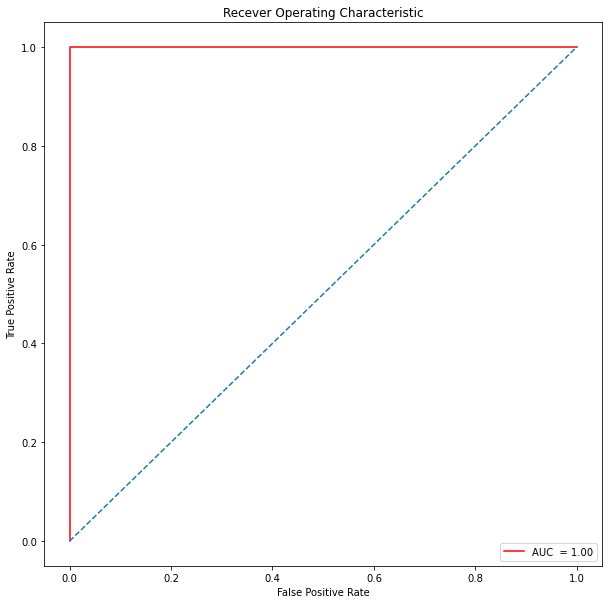

In [30]:
def plot_roc(roc_auc): 
    plt.figure(figsize = (10,10))
    plt.title('Recever Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, c = 'red', label = 'AUC  = %0.2f' % roc_auc) ## approximated to the two decimal places 
    plt.legend(loc ='lower right')
    plt.plot([0,1], [0,1], linestyle = '--') ## reference line to evaluate the roc curve 
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_roc(roc_auc)

Perfect roc curve with an AUC of 1 

### Linear discriminant analysis (LDA)

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

The confusion matrix is:
 [[843   0]
 [  0 782]]
The roc_auc is: 1.0


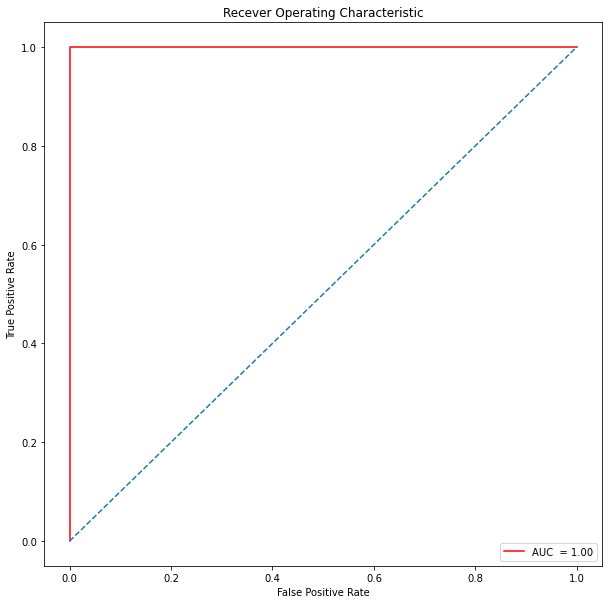

In [36]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
print(f'The confusion matrix is:\n {log_confusion_matrix}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
print(f'The roc_auc is: {roc_auc_lda}')

plot_roc(roc_auc)

As expected, the results are identical to linear regression, so LDA is a perfect classifier 

### Quadratic Discriminant Analysis (QDA) 

The confusion matrix is:
 [[843   0]
 [  0 782]]
The roc_auc is: 1.0


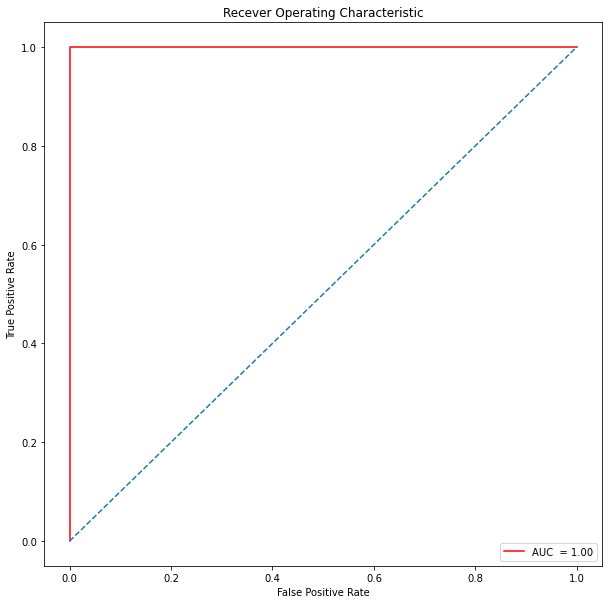

In [38]:
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
print(f'The confusion matrix is:\n {log_confusion_matrix}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
print(f'The roc_auc is: {roc_auc_qda}')

plot_roc(roc_auc_qda)

As expected, the results are identical to the previous analyses, so QDA is also a perfect classifier 